In [1]:
!pip install yfinance --quiet

     |████████████████████████████████| 62 kB 1.1 MB/s 


# Oil Price Prediction Using Machine Learning

In [2]:
# LinearRegression is a machine learning library for linear regression 
from sklearn.linear_model import LinearRegression 

# pandas and numpy are used for data manipulation 
import pandas as pd 
import numpy as np 

# matplotlib and seaborn are used for plotting graphs 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed


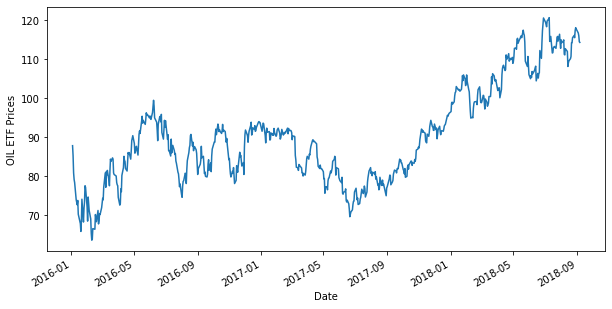

In [3]:
# Read data 
Df = yf.download('USO','2016-01-01','2018-09-10')

# Only keep close columns 
Df=Df[['Close']] 

# Drop rows with missing values 
Df= Df.dropna() 

# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("OIL ETF Prices")
plt.show()

In [4]:
# Define explanatory variables
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2016-01-15,73.306666,78.391110
2016-01-19,72.293332,76.444444
2016-01-20,70.693331,74.515555
2016-01-21,68.053332,72.853333
2016-01-22,67.440000,71.662222


In [5]:
# Define dependent variable
y = Df['Close']
y.head()

Date
2016-01-15    70.320000
2016-01-19    67.919998
2016-01-20    65.919998
2016-01-21    68.480003
2016-01-22    74.160004
Name: Close, dtype: float64

In [6]:
# Split the data into train and test dataset
t=.8 
t = int(t*len(Df)) 

# Train dataset 
X_train = X[:t] 
y_train = y[:t]  

# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [7]:
# Create a linear regression model
# Y = m1 * X1 + m2 * X2 + C
# Gold ETF price = m1 * 3 days moving average + m2 * 15 days moving average + c
linear = LinearRegression().fit(X_train,y_train) 
print("MJ ETF Price =", round(linear.coef_[0],2), "* 3 Days Moving Average", round(linear.coef_[1],2), "* 9 Days Moving Average +", round(linear.intercept_,2))

MJ ETF Price = 1.19 * 3 Days Moving Average -0.23 * 9 Days Moving Average + 2.97


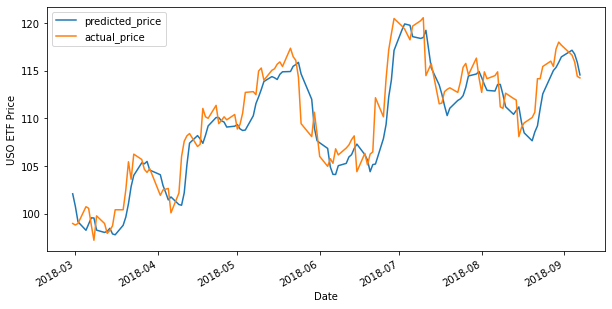

In [8]:
# Predicting the Oil ETF prices
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("USO ETF Price")  
plt.show()

In [9]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))

86.14

Oil Stock

In [10]:
Oil_stock = ['PBR', 'VALE', 'RIG', 'WLL']

In [11]:
start = '2016-01-01'
end = '2018-09-10'
df = yf.download(Oil_stock,start,end)

[*********************100%***********************]  4 of 4 completed


In [12]:
stocks = pd.DataFrame(df['Adj Close'])
stocks.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,2.822836,12.55,2.291325,37.848801
2016-01-05,2.769825,12.15,2.284074,35.902748
2016-01-06,2.617419,11.52,2.110049,31.414902
2016-01-07,2.524650,11.00,1.965029,29.945433
2016-01-08,2.484891,10.75,1.885267,30.858887


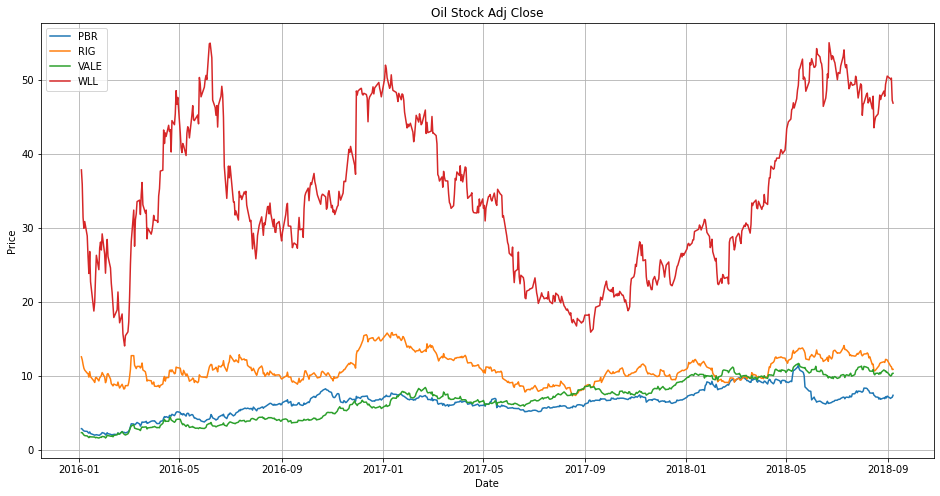

In [13]:
plt.figure(figsize=(16,8))
plt.plot(stocks)
plt.title('Oil Stock Adj Close')
plt.legend(stocks)
plt.grid()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

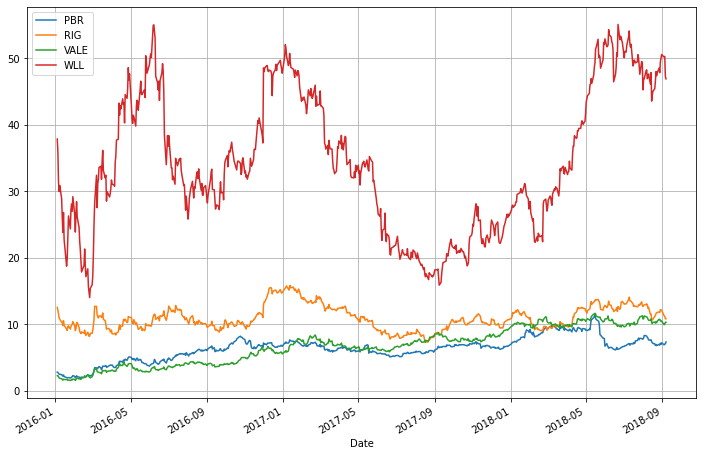

In [14]:
stocks.plot(grid = True, figsize=(12,8))

In [15]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,1.000000,1.000000,1.000000,1.000000
2016-01-05,0.981221,0.968127,0.996835,0.948584
2016-01-06,0.927230,0.917928,0.920886,0.830010
2016-01-07,0.894366,0.876494,0.857595,0.791186
2016-01-08,0.880282,0.856574,0.822785,0.815320


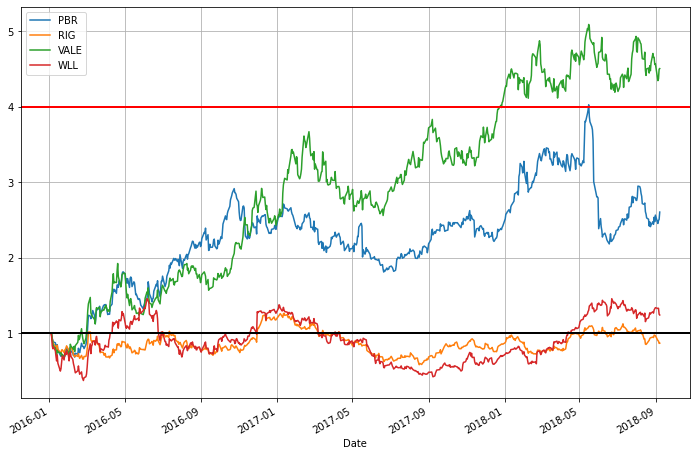

In [16]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)
plt.axhline(y=4, color = 'red', lw=2)

In [17]:
stock_return = stocks.pct_change(1).dropna()
stock_return.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.018779,-0.031873,-0.003165,-0.051416
2016-01-06,-0.055024,-0.051852,-0.076190,-0.125000
2016-01-07,-0.035443,-0.045139,-0.068729,-0.046776
2016-01-08,-0.015748,-0.022727,-0.040590,0.030504
2016-01-11,-0.010667,-0.038140,-0.023077,-0.063063


In [18]:
stock_return.tail()

,PBR,RIG,VALE,WLL
Date,,,,
2018-08-31,0.035238,-0.005747,0.002278,0.011122
2018-09-04,-0.043238,-0.066887,-0.049242,-0.007857
2018-09-05,0.015385,-0.008850,0.005578,0.002376
2018-09-06,0.006629,-0.033036,0.029319,-0.059648
2018-09-07,0.038570,0.001847,0.001540,-0.008192


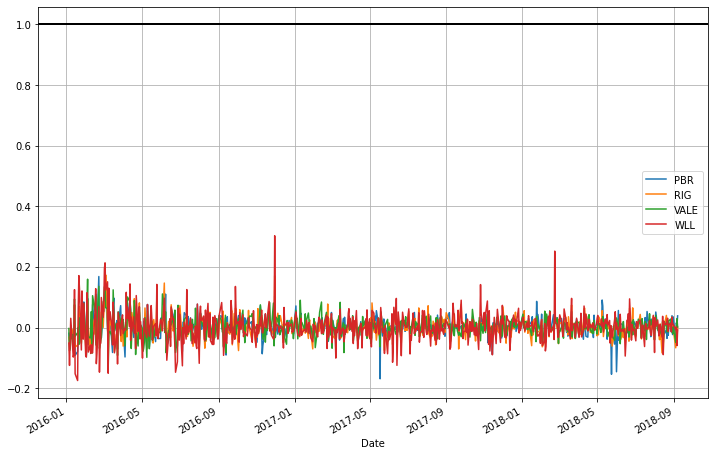

In [19]:
stock_return.plot(grid = True, figsize=(12,8)).axhline(y = 1, color = "black", lw = 2)

In [20]:
stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.018958,-0.032392,-0.003170,-0.052785
2016-01-06,-0.056596,-0.053244,-0.079249,-0.133531
2016-01-07,-0.036086,-0.046189,-0.071204,-0.047906
2016-01-08,-0.015873,-0.022990,-0.041437,0.030048


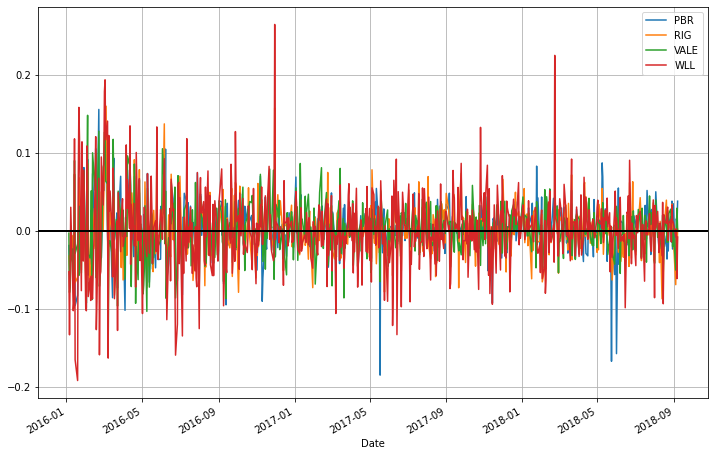

In [21]:
stock_change.plot(grid = True, figsize=(12,8)).axhline(y = 0, color = "black", lw = 2)

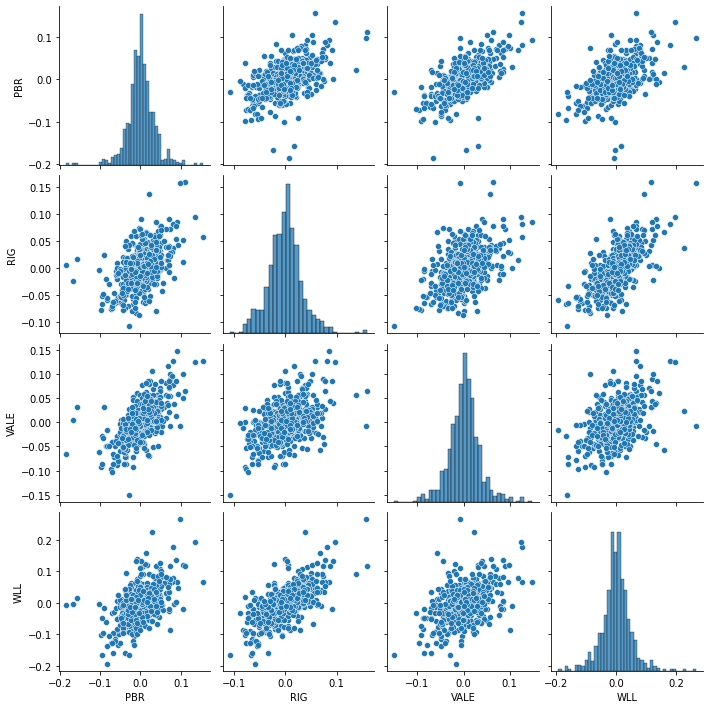

In [22]:
sns.pairplot(stock_change[1:])

In [23]:
stock_change.idxmin()

PBR    2017-05-18
RIG    2016-03-08
VALE   2016-03-08
WLL    2016-01-19
dtype: datetime64[ns]

In [24]:
stock_change.idxmax()

PBR    2016-02-22
RIG    2016-03-04
VALE   2016-02-04
WLL    2016-11-30
dtype: datetime64[ns]

In [25]:
stock_change.std()

PBR     0.034048
RIG     0.032994
VALE    0.034229
WLL     0.049464
dtype: float64

In [26]:
# Sharpe Ratio for Each Stocks
N = 252
returns = stocks.pct_change().dropna()
annualised_sharpe = np.sqrt(N) * returns.mean() / returns.std()
annualised_sharpe

PBR     0.931790
RIG     0.157730
VALE    1.299275
WLL     0.490911
dtype: float64

In [27]:
annualised_sharpe.index

Index(['PBR', 'RIG', 'VALE', 'WLL'], dtype='object')

In [28]:
annualised_sharpe.sort_values()

RIG     0.157730
WLL     0.490911
PBR     0.931790
VALE    1.299275
dtype: float64

In [29]:
annualised_sharpe.sort_index()

PBR     0.931790
RIG     0.157730
VALE    1.299275
WLL     0.490911
dtype: float64

In [30]:
# Equity Sharpe - Buy and Hold
N = 252 # Number of trading in a year
risk = 0.01
excess_daily_ret =  returns - (risk * N)
equity_sharpe = np.sqrt(N) * excess_daily_ret.mean() / excess_daily_ret.std()
equity_sharpe.sort_values()

RIG    -1203.023762
PBR    -1175.510211
VALE   -1160.078579
WLL     -800.001333
dtype: float64

In [31]:
# Market Neutral Sharpe
start = '2016-01-01'
end = '2018-09-10'
market = 'SPY'
ticker = ['PBR', 'VALE', 'RIG', 'WLL']
bench = yf.download(market,start,end)
stocks = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  4 of 4 completed


In [32]:
tick = pd.DataFrame(stocks['Adj Close'])
tick.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-04,2.822837,12.55,2.291325,37.848801
2016-01-05,2.769826,12.15,2.284074,35.902748
2016-01-06,2.617419,11.52,2.110049,31.414902
2016-01-07,2.524650,11.00,1.965029,29.945433
2016-01-08,2.484891,10.75,1.885267,30.858887


In [33]:
daily_rets = tick.pct_change().dropna()
daily_rets.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.018779,-0.031873,-0.003165,-0.051416
2016-01-06,-0.055024,-0.051852,-0.076191,-0.125000
2016-01-07,-0.035443,-0.045139,-0.068729,-0.046776
2016-01-08,-0.015748,-0.022727,-0.040590,0.030504
2016-01-11,-0.010667,-0.038140,-0.023077,-0.063063


In [34]:
bench_rets = bench['Adj Close'].pct_change().dropna()
bench_rets.head()

Date
2016-01-05    0.001691
2016-01-06   -0.012614
2016-01-07   -0.023992
2016-01-08   -0.010977
2016-01-11    0.000990
Name: Adj Close, dtype: float64

In [35]:
strat = (daily_rets.sub(bench_rets, axis=0))/2
strat.head()

,PBR,RIG,VALE,WLL
Date,,,,
2016-01-05,-0.010235,-0.016782,-0.002428,-0.026554
2016-01-06,-0.021205,-0.019619,-0.031788,-0.056193
2016-01-07,-0.005726,-0.010574,-0.022368,-0.011392
2016-01-08,-0.002386,-0.005875,-0.014807,0.020740
2016-01-11,-0.005828,-0.019565,-0.012033,-0.032027


In [36]:
N = 252
market_neutral_sharpe = np.sqrt(N) * strat.mean() / strat.std()
market_neutral_sharpe.sort_values()

RIG    -0.152391
WLL     0.304037
PBR     0.687238
VALE    1.091450
dtype: float64